## Plotter

In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from evolvepro.src.plot import read_exp_data, plot_variants_by_iteration

In [31]:
PATH_TO_FILES = 'TEST/rounds/RF1k/giacomelli_boltz2_embedding_1000PC_RF1k/'
OUTPUT_PATH = 'TEST_PLOT/MEAN_GRAPHS'
OUTPUT_FILE_NAME = 'Giacomelli_Boltz2_PCA_1000PC_RF1k'
rounds = list(range(1, 11))

In [32]:
def extract_round_number(filename):
    #search number after 'str'
    match = re.search(r'Round(\d+)', filename)
    return int(match.group(1)) if match else None

In [35]:
percent1 = []

round_files1 = os.listdir(f'{PATH_TO_FILES}REPL1')

files_sorted1 = sorted([f for f in round_files1 if extract_round_number(f) is not None], key=extract_round_number)
files_sorted1.pop()

for i in files_sorted1:
    
    f = os.path.join(f'{PATH_TO_FILES}REPL1/' , i)
    df = pd.read_csv(f)

    # Conta il numero totale di righe nel file
    count = len(df)

    # Conta solo le righe in cui 'activity' > n
    positive = (df['activity'] > 1).sum()

    # Calcola la percentuale
    perc = (positive / count) * 100

    # Aggiunge la percentuale alla lista
    percent1.append(perc)

percent1

[10.0, 0.0, 20.0, 0.0, 10.0, 20.0, 50.0, 30.0, 50.0, 30.0]

In [36]:
percent2 = []

round_files2 = os.listdir(f'{PATH_TO_FILES}REPL2')

files_sorted2 = sorted([f for f in round_files2 if extract_round_number(f) is not None], key=extract_round_number)
files_sorted2.pop()

for i in files_sorted2:
    
    f = os.path.join(f'{PATH_TO_FILES}REPL2/' , i)
    df = pd.read_csv(f)

    # Conta il numero totale di righe nel file
    count = len(df)

    # Conta solo le righe in cui 'activity' > n
    positive = (df['activity'] > 1).sum()

    # Calcola la percentuale
    perc = (positive / count) * 100

    # Aggiunge la percentuale alla lista
    percent2.append(perc)

percent2

[0.0, 0.0, 10.0, 10.0, 10.0, 10.0, 10.0, 0.0, 0.0, 0.0]

In [37]:
percent3 = []

round_files3 = os.listdir(f'{PATH_TO_FILES}REPL3')

files_sorted3 = sorted([f for f in round_files3 if extract_round_number(f) is not None], key=extract_round_number)
files_sorted3.pop()

for i in files_sorted3:
    
    f = os.path.join(f'{PATH_TO_FILES}REPL3/' , i)
    df = pd.read_csv(f)

    # Conta il numero totale di righe nel file
    count = len(df)

    # Conta solo le righe in cui 'activity' > n
    positive = (df['activity'] > 1).sum()

    # Calcola la percentuale
    perc = (positive / count) * 100

    # Aggiunge la percentuale alla lista
    percent3.append(perc)

percent3

[20.0, 40.0, 50.0, 10.0, 20.0, 30.0, 30.0, 30.0, 20.0, 10.0]

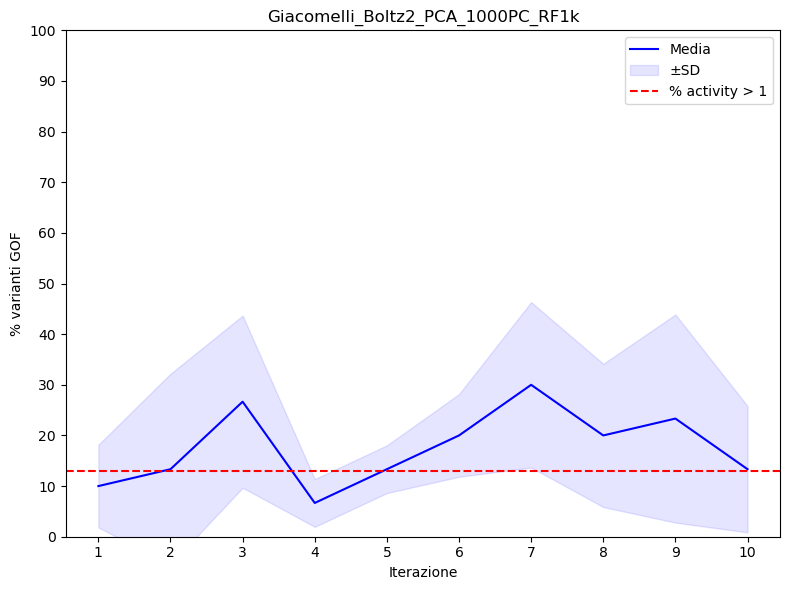

In [38]:
data = np.vstack([percent1, percent2, percent3])
mean = data.mean(axis=0)
std = data.std(axis=0)

iterations = np.arange(1, 11)

baseline = 13  # <-- qui metti la baseline random per il dataset

plt.figure(figsize=(8,6))
plt.plot(iterations, mean, label="Media", color="blue")
plt.fill_between(iterations, mean-std, mean+std, alpha=0.1, color="blue", label="±SD")
plt.axhline(baseline, color="red", linestyle="--", label="% activity > 1")

plt.xticks(iterations)
plt.ylim(0 , 100)
plt.yticks(np.arange(0, 101, 10))

plt.xlabel("Iterazione")
plt.ylabel("% varianti GOF")
plt.title(OUTPUT_FILE_NAME)
plt.legend()
plt.tight_layout()

plt.savefig(f'{OUTPUT_PATH}/ONEGRAPH_{OUTPUT_FILE_NAME}')

plt.show()

In [39]:
PATH1 = f'{PATH_TO_FILES}REPL1'

round_base_path = PATH1
round_file_names = os.listdir(PATH1)
names_sorted = sorted([f for f in round_file_names if extract_round_number(f) is not None], key=extract_round_number)
names_sorted.pop()
round_file_names = names_sorted

wt_fasta_path = "TEST/fasta/giacomelli_WT.fasta"

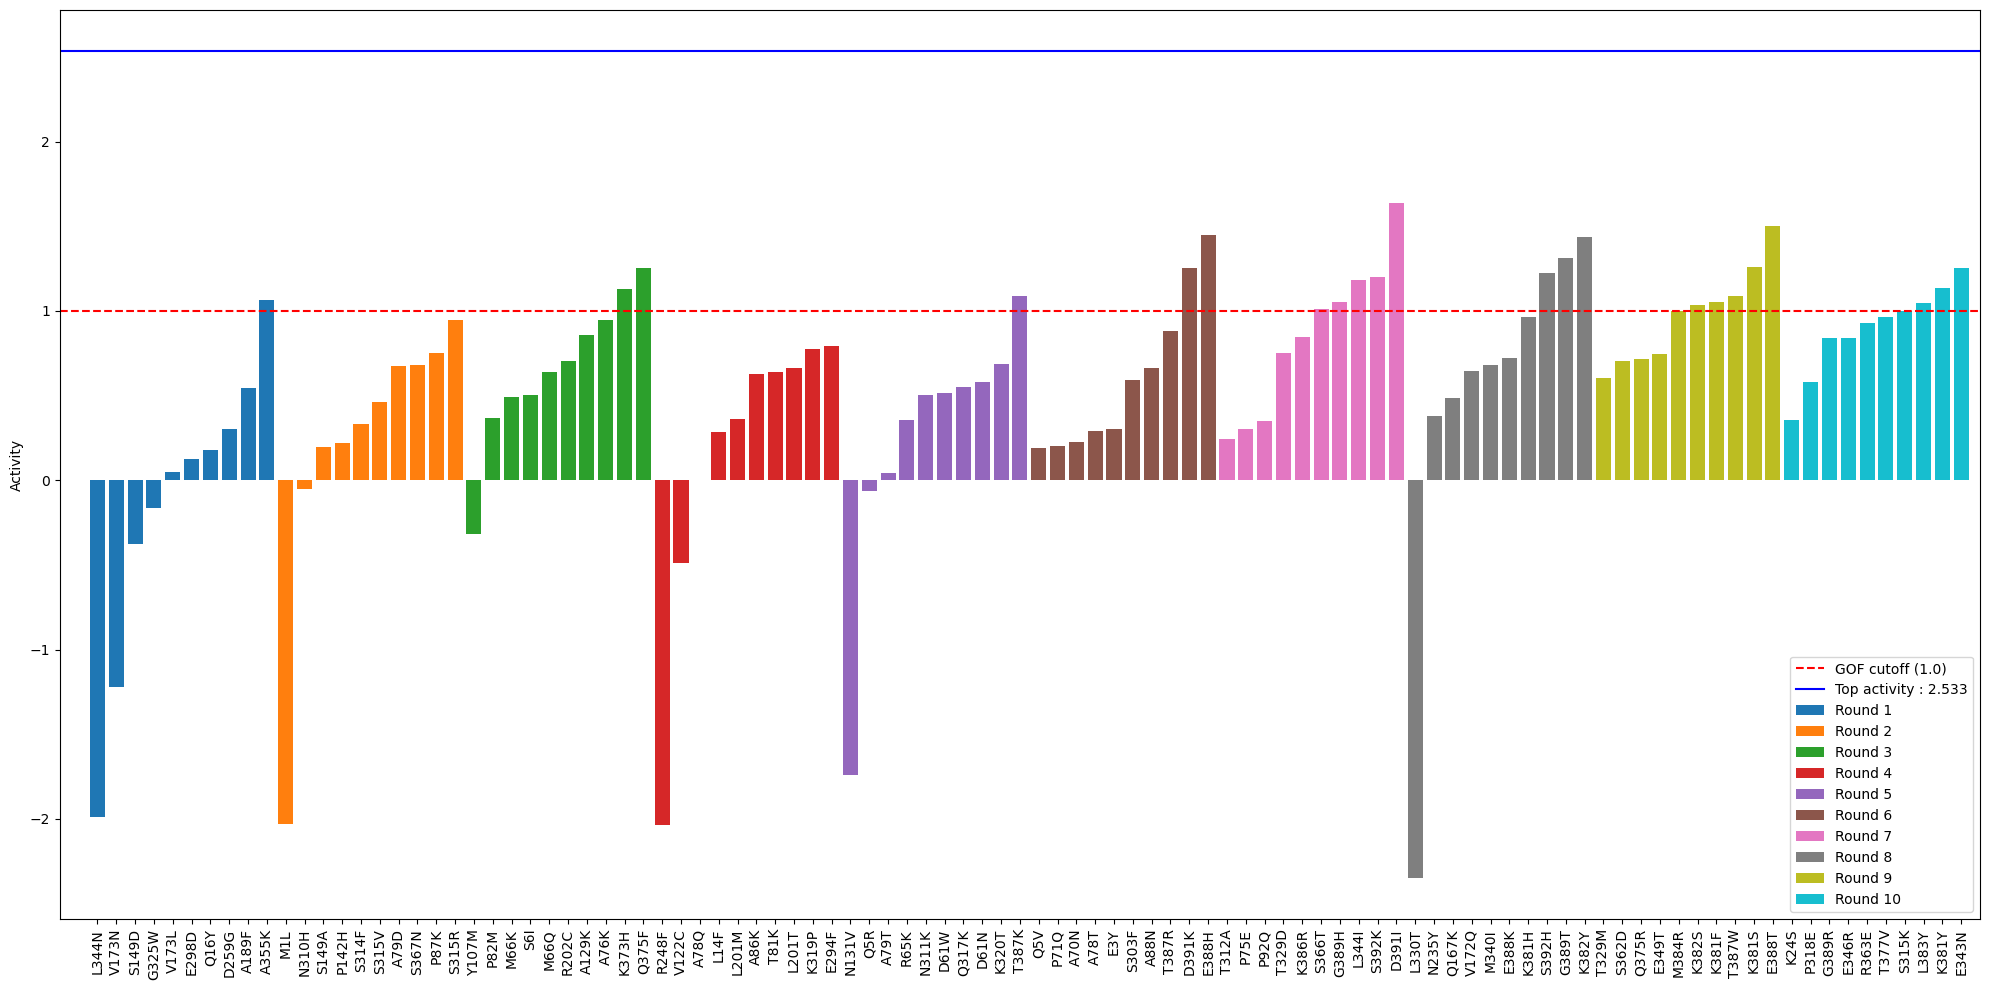

In [40]:
df = read_exp_data(round_base_path, round_file_names, wt_fasta_path)
plot_variants_by_iteration(df, activity_column='activity', output_dir='TEST_PLOT', output_file=f"REPL1_{OUTPUT_FILE_NAME}", cutoff=1.0 , max_activity=2.533)

In [41]:
PATH2 = f'{PATH_TO_FILES}REPL2'

round_base_path = PATH2
round_file_names = os.listdir(PATH2)
names_sorted = sorted([f for f in round_file_names if extract_round_number(f) is not None], key=extract_round_number)
names_sorted.pop()
round_file_names = names_sorted

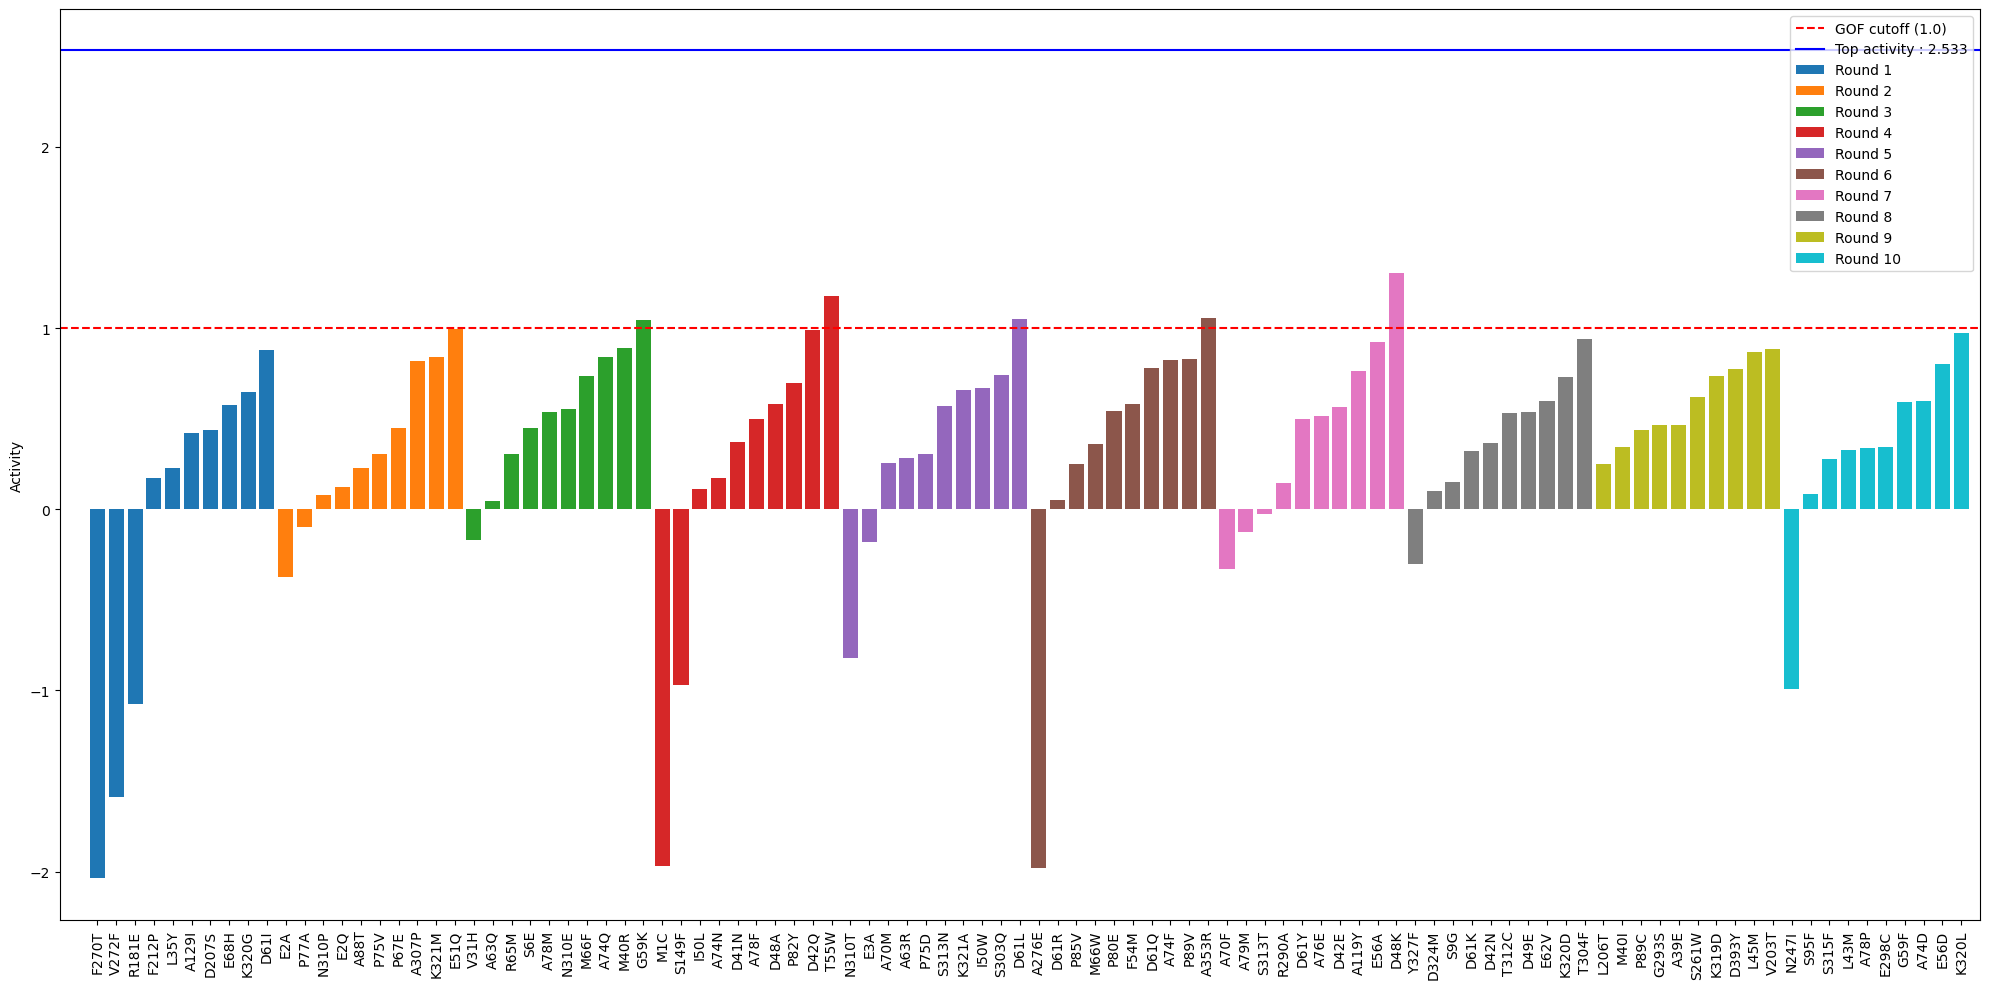

In [42]:
df = read_exp_data(round_base_path, round_file_names, wt_fasta_path)
plot_variants_by_iteration(df, activity_column='activity', output_dir='TEST_PLOT', output_file=f"REPL2_{OUTPUT_FILE_NAME}", cutoff=1.0 , max_activity=2.533)

In [43]:
PATH3 = f'{PATH_TO_FILES}REPL3'

round_base_path = PATH3
round_file_names = os.listdir(PATH3)
names_sorted = sorted([f for f in round_file_names if extract_round_number(f) is not None], key=extract_round_number)
names_sorted.pop()
round_file_names = names_sorted

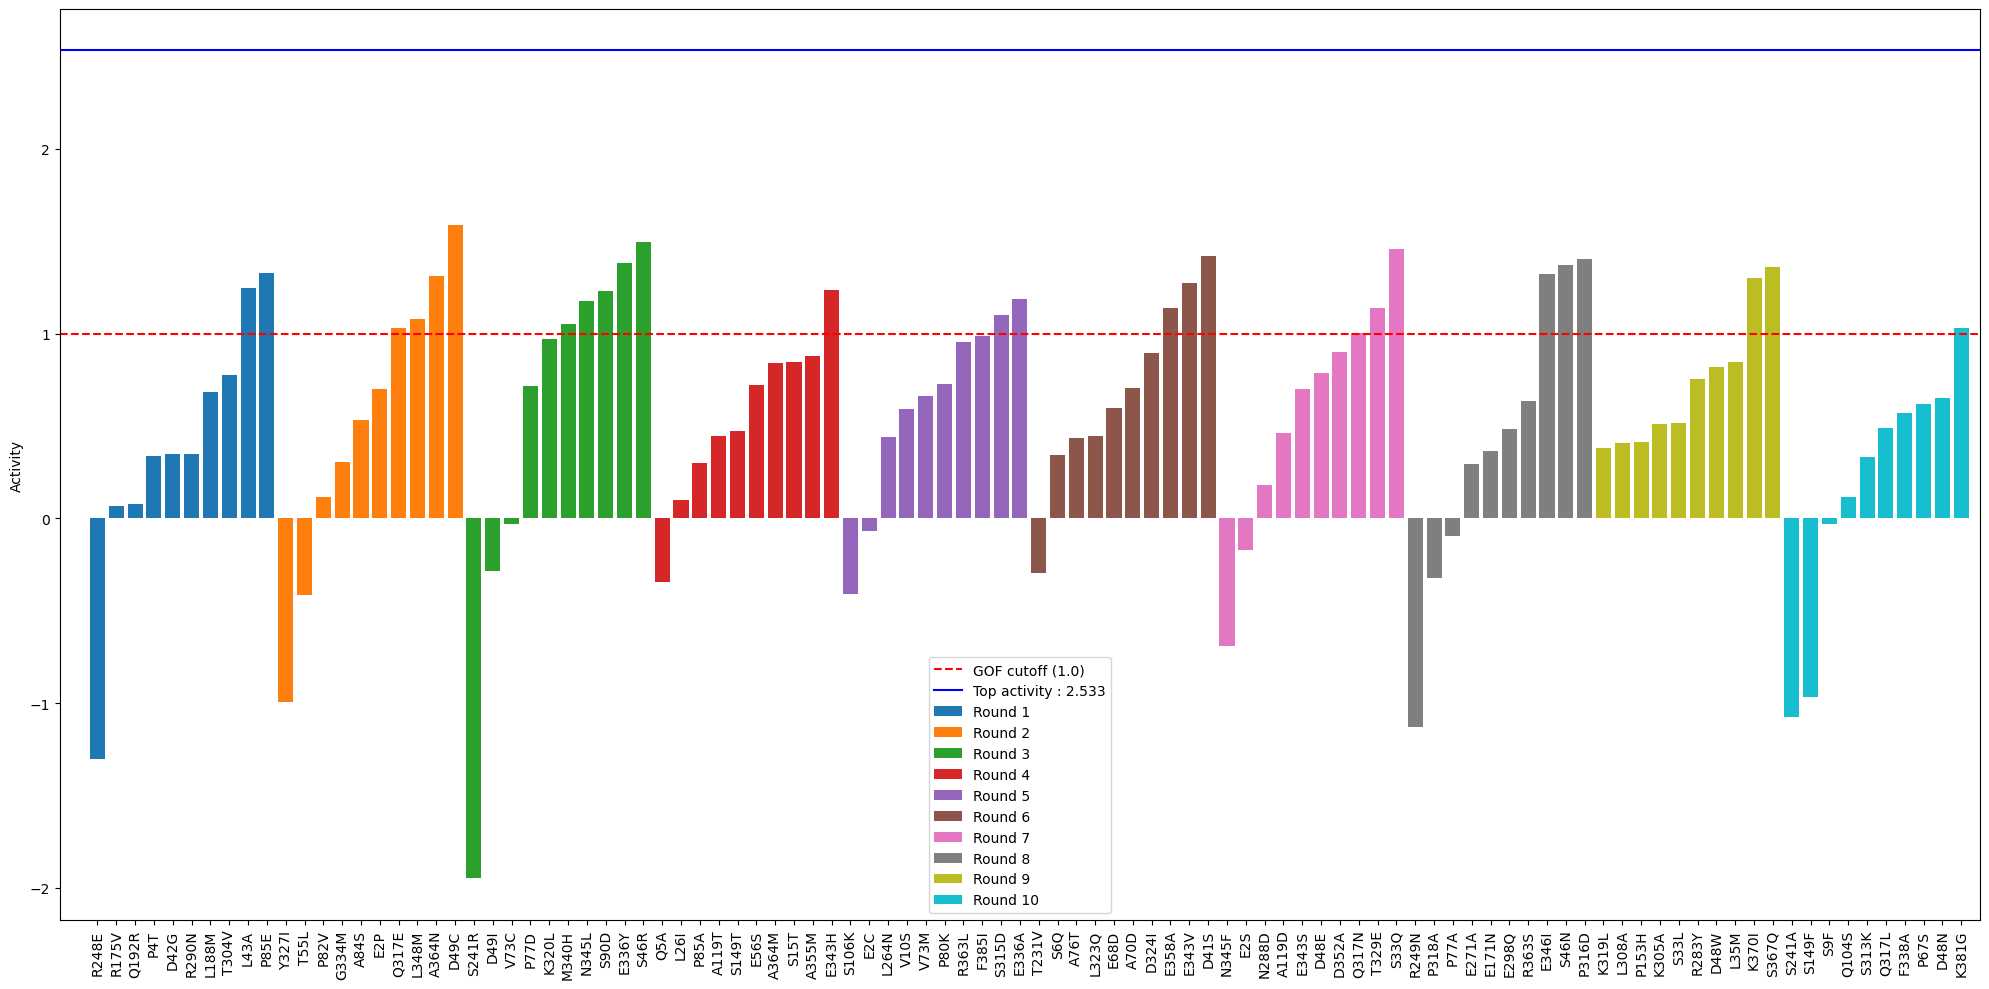

In [44]:
df = read_exp_data(round_base_path, round_file_names, wt_fasta_path)
plot_variants_by_iteration(df, activity_column='activity', output_dir='TEST_PLOT', output_file=f"REPL3_{OUTPUT_FILE_NAME}", cutoff=1.0 , max_activity=2.533)